In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import caffe
caffe_root = '../' 

In [2]:
MODEL_FILE = caffe_root+'data/alex/places205CNN_deploy_upgraded.prototxt'
PRETRAINED = caffe_root+'data/alex/places205CNN_iter_300000_upgraded.caffemodel'
MEAN_FILE = caffe_root+'data/alex/places205CNN_mean.binaryproto'

In [3]:
imagenet_label_file = caffe_root + 'data/alex/categoryIndex_places205.csv'
labels = list(np.loadtxt(imagenet_label_file, str, delimiter='\,'))
assert len(labels) == 205
print( 'Loaded places205 labels:\n', '\n'.join(labels[:10] + ['...']))

Loaded places205 labels:
 /a/abbey 0
/a/airport_terminal 1
/a/alley 2
/a/amphitheater 3
/a/amusement_park 4
/a/aquarium 5
/a/aqueduct 6
/a/arch 7
/a/art_gallery 8
/a/art_studio 9
...


In [4]:
proto_data = open(MEAN_FILE, 'rb').read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]


In [5]:
caffe.set_mode_cpu()


In [6]:
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))
print ("successfully loaded classifier")

successfully loaded classifier


/c/conference_room 51
/c/conference_center 50
/a/auditorium 12
/b/ballroom 15
/b/banquet_hall 17


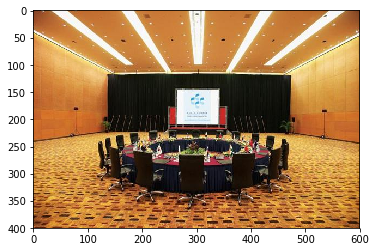

In [7]:
# download an image
#my_image_url = "http://places2.csail.mit.edu/imgs/2.jpg"  # paste your URL here
# for example:
# my_image_url = "https://upload.wikimedia.org/wikipedia/commons/b/be/Orang_Utan%2C_Semenggok_Forest_Reserve%2C_Sarawak%2C_Borneo%2C_Malaysia.JPG"
#!wget -O image.jpg $my_image_url

# transform it and copy it into the net
#input_image = caffe.io.load_image('image.jpg')
input_image = caffe.io.load_image(caffe_root+'data/alex/10.jpg')
# test on a image
#IMAGE_FILE = 'path/to/image/img.png'
#input_image = caffe.io.load_image(IMAGE_FILE)
# predict takes any number of images,
# and formats them for the Caffe net automatically
pred = net.predict([input_image])
net.forward()
output_prob = net.blobs['prob'].data[0]
top_inds = output_prob.argsort()[::-1][:5]

for i in top_inds: print (labels[i])
plt.imshow(input_image)


In [8]:
output_prob[top_inds],top_inds
for i in top_inds: print (labels[i])

/c/conference_room 51
/c/conference_center 50
/a/auditorium 12
/b/ballroom 15
/b/banquet_hall 17


In [11]:
top_inds,output_prob[top_inds]

(array([51, 50, 12, 15, 17]),
 array([ 0.41086546,  0.29621962,  0.18488258,  0.07007287,  0.02392925], dtype=float32))